In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

# 1. Linear SVM

In [2]:
data = pd.read_csv("../../datasets/knn.csv")
data.head()

,age,salary,level
0,30,250000,Level A
1,20,400000,Level A
2,35,300000,Level A
3,24,270000,Level A
4,26,380000,Level A


### Normalizing the data

In [3]:
data.iloc[:,:2] = MinMaxScaler().fit_transform(data.iloc[:,:2])
data.head()

,age,salary,level
0,0.303030,0.000000,Level A
1,0.000000,0.681818,Level A
2,0.454545,0.227273,Level A
3,0.121212,0.090909,Level A
4,0.181818,0.590909,Level A


### Converting data into numpy.ndarray to make it desirable for mlxtend (later used for plotting)

In [4]:
X = data.iloc[:,:2].as_matrix()
maps = {'Level A':0, 'Level B':1}
y = data.level.replace(maps)
y = y.as_matrix().astype(int)

### Building SVM model

In [5]:
model = SVC(C = 10, kernel = "linear")
model.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

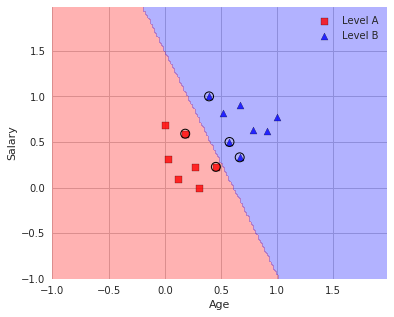

In [6]:
plt.figure(figsize=(6, 5))
plot_decision_regions(X, y, clf=model, X_highlight=model.support_vectors_)
plt.xlabel('Age')
plt.ylabel('Salary')
handles, labels =  plt.gca().get_legend_handles_labels()
maps_rev = {y:x for x,y in maps.items()} # switch positions of key-value pairs
plt.legend(handles, list(map(maps_rev.get, [int(i) for i in maps_rev])))
plt.show()

### Estimating the values

In [7]:
est = model.predict(data.iloc[:,:2])
est

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

### Confusion Matrix

In [8]:
from sklearn import metrics
actual = data.iloc[:,2].replace(maps)
cm = metrics.confusion_matrix(actual, est, labels=pd.unique(actual))
cm

array([[7, 0],
       [0, 8]])

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa684036b38>)

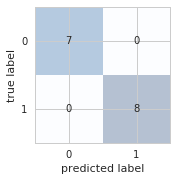

In [9]:
plot_confusion_matrix(cm)

### Accuracy of the model

In [10]:
model.score(data.iloc[:,:2], actual) * 100

100.0

### Support Vectors

In [11]:
print("Number of Support Vectors: ", len(model.support_))
model.support_vectors_

Number of Support Vectors:  5


array([[0.45454545, 0.22727273],
       [0.18181818, 0.59090909],
       [0.39393939, 1.        ],
       [0.57575758, 0.50002273],
       [0.66666667, 0.33181818]])

### Visualizing the model

### Slack variable

In [12]:
model.epsilon

0.0

## Regularization parameter C
$C\propto \frac{1}{Margin Length}$

### With smaller value of C (0.5), we obtain larger Margin length and hence more Support Vectors

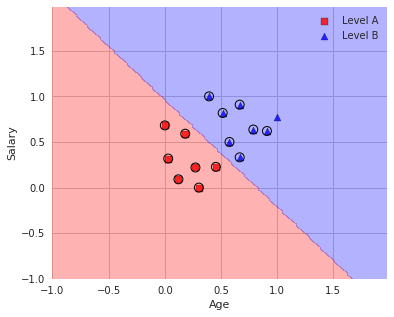

In [13]:
model_C05 = SVC(C = 0.5, kernel = 'linear')
model_C05.fit(X, y)

plt.figure(figsize=(6, 5))
plot_decision_regions(X, y, clf=model_C05, X_highlight=model_C05.support_vectors_)
plt.xlabel('Age')
plt.ylabel('Salary')
handles, labels =  plt.gca().get_legend_handles_labels()
maps_rev = {y:x for x,y in maps.items()} # switch positions of key-value pairs
plt.legend(handles, list(map(maps_rev.get, [int(i) for i in maps_rev])))
plt.show()

### With larger value of C (1000), we obtain smaller Margin length and hence less Support Vectors

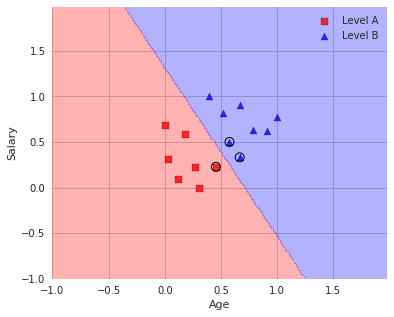

In [14]:
model_C1000 = SVC(C = 1000, kernel = 'linear')
model_C1000.fit(X, y)

plt.figure(figsize=(6, 5))
plot_decision_regions(X, y, clf=model_C1000, X_highlight=model_C1000.support_vectors_)
plt.xlabel('Age')
plt.ylabel('Salary')
handles, labels =  plt.gca().get_legend_handles_labels()
maps_rev = {y:x for x,y in maps.items()} # switch positions of key-value pairs
plt.legend(handles, list(map(maps_rev.get, [int(i) for i in maps_rev])))
plt.show()

### Finding best value of C using Cross-Validation

In [15]:
from sklearn.model_selection import cross_val_score
cv_scores = []
for c in [0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    model_cv = SVC(C = c, kernel = 'linear')
    model_cv.fit(data.iloc[:,:2], data.iloc[:,2])
    scores = cross_val_score(model_cv, data.iloc[:,:2], data.iloc[:,2], cv=3, scoring='accuracy')
    cv_scores.append(scores.mean()*100)

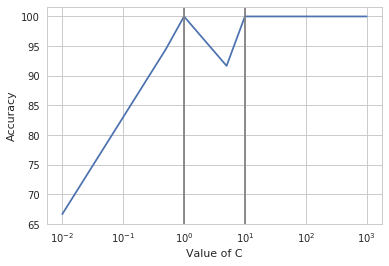

In [16]:
plt.plot([0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000],cv_scores)
plt.xscale("log")
plt.xlabel("Value of C")
plt.ylabel("Accuracy")
plt.axvline(1, color='.5')
plt.axvline(10, color='.5')

### Hyperparameter Gamma (helps to define the size of non-linear kernel)

In [17]:
model.gamma     # auto = 1/n_features. Here, features = 2. Hence, gamma = 0.5

'auto'

In [18]:
m = SVC(gamma = 1, C = 10, kernel = "linear")
from sklearn.model_selection import cross_val_score
cv_scores = []
for g in [0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000]:
    model_cv = SVC(gamma = g, C = 10, kernel = "linear")
    model_cv.fit(data.iloc[:,:2], data.iloc[:,2])
    scores = cross_val_score(model_cv, data.iloc[:,:2], data.iloc[:,2], cv=3, scoring='accuracy')
    cv_scores.append(scores.mean()*100)

Text(0,0.5,'Accuracy')

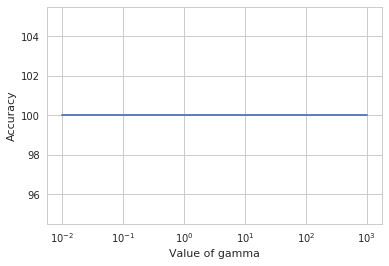

In [19]:
plt.plot([0.01, 0.5, 1, 5, 10, 50, 100, 500, 1000],cv_scores)
plt.xscale("log")
plt.xlabel("Value of gamma")
plt.ylabel("Accuracy")

# 2. Non-linear kernel

In [20]:
data = pd.read_csv("../../datasets/svm.csv")
data.head()

,X1,X2,y
0,1.0,2.4,Category A
1,1.2,2.8,Category A
2,1.5,1.6,Category A
3,2.0,3.2,Category A
4,2.5,2.0,Category A


### Visualization

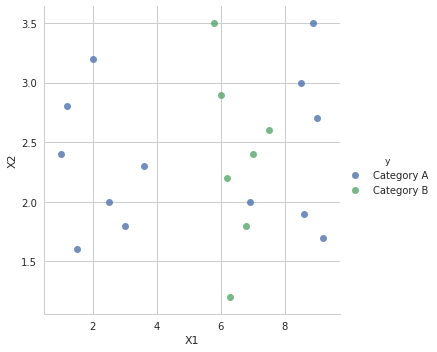

In [21]:
temp = pd.DataFrame([data.iloc[:,0], data.iloc[:,1], data.iloc[:,2]]).T
sns.lmplot("X1", "X2", data = temp, hue='y', fit_reg=False)

### Converting data into numpy.ndarray to make it desirable for mlxtend (later used for plotting)

In [22]:
X = data.iloc[:,:2].as_matrix()
maps = {'Category A':0, 'Category B':1}
y = data.y.replace(maps)
y = y.as_matrix().astype(int)

### Building non-linear SVM model

In [23]:
model = SVC(kernel = "rbf", C=500) # Radial Basis Function (Gaussian kernel)
model.fit(X, y)

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Visualization

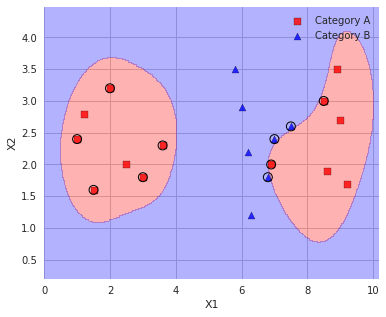

In [24]:
plt.figure(figsize=(6, 5))
plot_decision_regions(X, y, clf=model, X_highlight=model.support_vectors_)
plt.xlabel('X1')
plt.ylabel('X2')
handles, labels =  plt.gca().get_legend_handles_labels()
maps_rev = {y:x for x,y in maps.items()} # switch positions of key-value pairs
plt.legend(handles, list(map(maps_rev.get, [int(i) for i in maps_rev])))
plt.show()

### Estimating values

In [25]:
est = model.predict(data.iloc[:,:2])
est

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [26]:
from sklearn import metrics
actual = data.iloc[:,2].replace(maps)
cm = metrics.confusion_matrix(actual, est, labels=pd.unique(actual))
cm

array([[13,  0],
       [ 0,  7]])

(<Figure size 180x180 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa681bac390>)

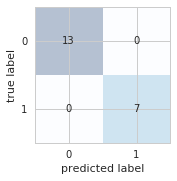

In [27]:
plot_confusion_matrix(cm)

### Accuracy

In [28]:
model.score(X, y) * 100

100.0

# 3. Multiple class classification

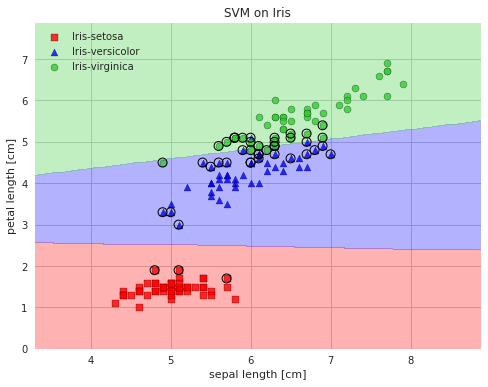

In [29]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# In case if the original data categories name were present 
# then we replace them with numbers
d = {"Iris-setosa" : 0, "Iris-versicolor": 1, "Iris-virginica": 2} 

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)


# Plotting decision regions
plt.figure(figsize=(8,6))
plot_decision_regions(X, y, clf=svm, legend=2, X_highlight=svm.support_vectors_)

# Adding legend 
handles, labels =  plt.gca().get_legend_handles_labels()
d_rev = {y:x for x,y in d.items()} # switching key-value pairs
plt.legend(handles, list(map(d_rev.get, [int(i) for i in d_rev])))

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()